In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
from annotator_amide_trans import annotator
from pybaselines.polynomial import imodpoly
%matplotlib widget

In [3]:
wave_no = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')
scan_48 = pd.read_csv('../mdi_optimization/cleaned_csvs/48_scans.csv').drop(columns=['wave_no'])

kgy2_5_sn48 = pd.read_csv('2.5kgy/2.5kgy_sn48.csv')
kgy5_sn48 = pd.read_csv('5kgy/5kgy_sn48.csv')
kgy10_sn48 = pd.read_csv('10kgy/10kgy_sn48.csv')
kgy25_sn48 = pd.read_csv('25kgy/25kgy_sn48.csv')
kgy50_sn48 = pd.read_csv('50kgy/50kgy_sn48.csv')


for df in [scan_48, kgy2_5_sn48, kgy5_sn48, kgy10_sn48, kgy25_sn48, kgy50_sn48]:
    df['average'] = df.iloc[:,:].mean(axis=1)

# colors = ['blue', '#fcbba1', '#fc9272', '#fb6a4a', '#ef3b2c', '#cb181d'] #sequential (red)
# colors = ['black','blue','green', 'red'] #sequential (red) cut!
colors = ['black', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00'] #qualitative

dose_names = ['0 kGy', '2.5 kGy', '10 kGy', '5 kGy', '25 kGy', '50 kGy']
#dose_names = ['0 kGy','5 kGy', '10 kGy', '50 kGy']

def trans(abs):
    data = ((10 ** -abs) * 100)
    return data

In [4]:
baselined_2_5 = pd.DataFrame()
for sample in kgy2_5_sn48:
    raw = kgy2_5_sn48[sample]
    bs = imodpoly(raw)[0]
    bs_corrected = raw-bs
    
    baselined_2_5[sample] = pd.Series(bs_corrected)

baselined_25 = pd.DataFrame()
for sample in kgy25_sn48:
    raw = kgy25_sn48[sample]
    bs = imodpoly(raw)[0]
    bs_corrected = raw-bs
    
    baselined_25[sample] = pd.Series(bs_corrected)

<h1 style="text-align: center;">Molecular Features of Irradiated Samples</h1>

<h2>Raw Spectra</h2>

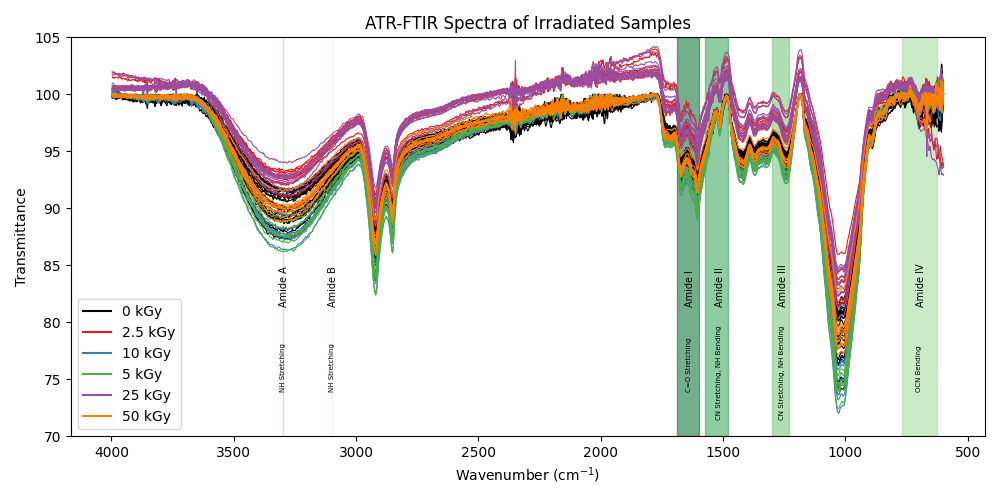

In [5]:
irrad_comp, axis = plt.subplots(1,1, figsize=(10,5))
data = [scan_48, baselined_2_5, kgy5_sn48, kgy10_sn48, baselined_25, kgy50_sn48]

for color, df in zip(colors, data):
    for sample in df.columns:
        axis.plot(wave_no, trans(df[sample]), color=color, linewidth=0.8)

for color, name in zip(colors, dose_names):
    axis.plot([],[], color=color, label=name)

annotator(axis)
axis.invert_xaxis()
axis.set(title='ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

axis.legend()
irrad_comp.tight_layout()

<h2>Averaged Spectra</h2>

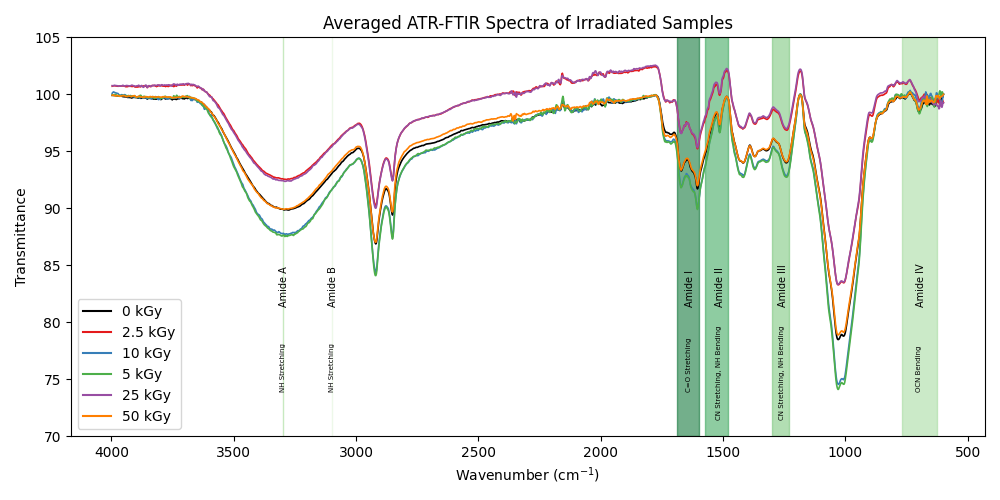

In [8]:
irrad_ave, axis = plt.subplots(1,1, figsize=(10,5))

ave = [trans(df['average']) for df in data]

for color, name, spec in zip(colors, dose_names, ave):
    axis.plot([],[], color=color, label=name)
    axis.plot(wave_no, spec, color=color, linewidth=1.2)

axis.set(title='Averaged ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Transmittance')

annotator(axis)
axis.invert_xaxis()

axis.legend()
irrad_ave.tight_layout()